In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
data=pd.read_csv(r"C:\Users\rajer\AAPL_stock_prices.csv")
data

,Unnamed: 0,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,1999-11-01,80.000,80.6900,77.37,77.62,0.589041,2487300,0.0,1.0
1,1999-11-02,78.000,81.6900,77.31,80.25,0.608999,3564600,0.0,1.0
2,1999-11-03,81.620,83.2500,81.00,81.50,0.618485,2932700,0.0,1.0
3,1999-11-04,82.060,85.3700,80.62,83.62,0.634574,3384700,0.0,1.0
4,1999-11-05,84.620,88.3700,84.00,88.31,0.670165,3721500,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5891,2023-03-31,162.440,165.0000,161.91,164.90,164.900000,68749792,0.0,1.0
5892,2023-04-03,164.270,166.2900,164.22,166.17,166.170000,56976187,0.0,1.0
5893,2023-04-04,166.595,166.8400,165.11,165.63,165.630000,46278295,0.0,1.0
5894,2023-04-05,164.740,165.0500,161.80,163.76,163.760000,51511744,0.0,1.0


In [3]:
data.drop(data.columns[[2,3,4,5,6,7,8]],axis = 1 ,inplace = True)

In [4]:
data

,Unnamed: 0,1. open
0,1999-11-01,80.000
1,1999-11-02,78.000
2,1999-11-03,81.620
3,1999-11-04,82.060
4,1999-11-05,84.620
...,...,...
5891,2023-03-31,162.440
5892,2023-04-03,164.270
5893,2023-04-04,166.595
5894,2023-04-05,164.740


In [5]:
data.columns = ['Date','Open']

In [6]:
data

,Date,Open
0,1999-11-01,80.000
1,1999-11-02,78.000
2,1999-11-03,81.620
3,1999-11-04,82.060
4,1999-11-05,84.620
...,...,...
5891,2023-03-31,162.440
5892,2023-04-03,164.270
5893,2023-04-04,166.595
5894,2023-04-05,164.740


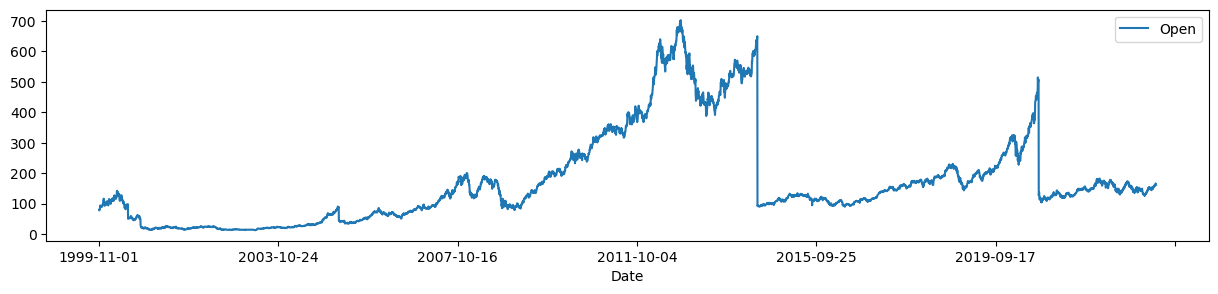

In [7]:
data.plot.line(x = 'Date',y = 'Open',figsize=(15,3))
plt.show()  # Pattern = Random

In [8]:
df4 = pd.DataFrame(data)
start_date = '1999-11-00'
end_date = '2020-11-02'
mask = (df4['Date'] > start_date) & (df4['Date'] <= end_date)
  
df4 = df4.loc[mask]
display(df4)

,Date,Open
0,1999-11-01,80.00
1,1999-11-02,78.00
2,1999-11-03,81.62
3,1999-11-04,82.06
4,1999-11-05,84.62
...,...,...
5281,2020-10-27,115.49
5282,2020-10-28,115.05
5283,2020-10-29,112.37
5284,2020-10-30,111.06


In [9]:
data2 = df4.set_index("Date")
data2

,Open
Date,
1999-11-01,80.00
1999-11-02,78.00
1999-11-03,81.62
1999-11-04,82.06
1999-11-05,84.62
...,...
2020-10-27,115.49
2020-10-28,115.05
2020-10-29,112.37


In [10]:
model2 = ExponentialSmoothing(data2,trend='add',seasonal='mul',seasonal_periods=12).fit()
model2.params
          # initial_seasons=np.array([0.88,0.93,1.04,1.02,0.96,1.07,1.17,1.17,1.07,0.94,0.82,0.93]))

C:\Users\rajer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'smoothing_level': 0.9596250996737639,
 'smoothing_trend': 0.00014393090583262696,
 'smoothing_seasonal': 0.03229916055568921,
 'damping_trend': nan,
 'initial_level': 87.10574021406974,
 'initial_trend': 0.36568936126962515,
 'initial_seasons': array([1.05009904, 1.056335  , 1.0735678 , 1.06154796, 1.05584779,
        1.01769165, 1.03657891, 1.05302699, 1.06064034, 1.05768969,
        1.06159383, 1.05135113]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [11]:
model2.fittedvalues

Date
1999-11-01     91.853664
1999-11-02     81.341152
1999-11-03     79.800022
1999-11-04     81.019837
1999-11-05     81.961988
                 ...    
2020-10-27    113.697553
2020-10-28    115.214767
2020-10-29    115.944086
2020-10-30    112.846831
2020-11-02    109.750040
Length: 5286, dtype: float64

In [12]:
Forecast2 = model2.forecast(29)
Forecast2

C:\Users\rajer\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


5286    109.874980
5287    109.836785
5288    110.448965
5289    108.798468
5290    111.229827
5291    111.528847
5292    111.825949
5293    111.554857
5294    111.301743
5295    112.058314
5296    112.444142
5297    111.100436
5298    111.849917
5299    111.808084
5300    112.428290
5301    110.745307
5302    113.217210
5303    113.518609
5304    113.818051
5305    113.539183
5306    113.278637
5307    114.045704
5308    114.435432
5309    113.065031
5310    113.824855
5311    113.779382
5312    114.407615
5313    112.692146
5314    115.204593
dtype: float64

<AxesSubplot:xlabel='Date'>

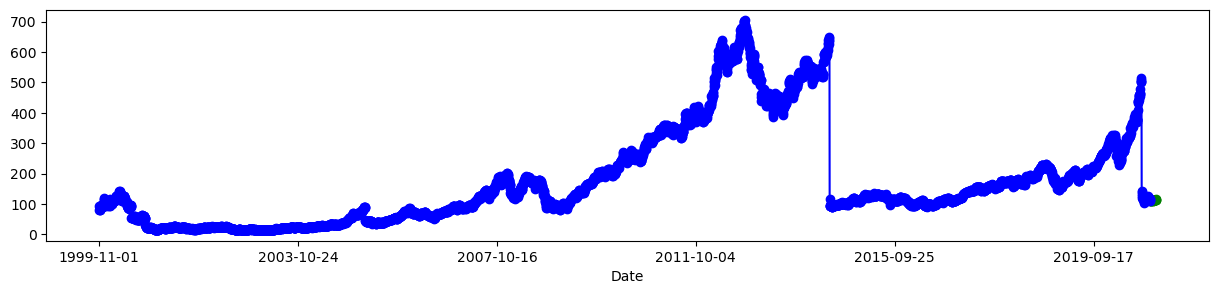

In [13]:
# plot
Forecast2.plot(marker='o', color='green')
model2.fittedvalues.plot(marker='o',  color='blue',figsize=(15,3))

In [14]:
data2["Forecast"]=model2.fittedvalues
data2.head()

,Open,Forecast
Date,,
1999-11-01,80.00,91.853664
1999-11-02,78.00,81.341152
1999-11-03,81.62,79.800022
1999-11-04,82.06,81.019837
1999-11-05,84.62,81.961988


In [15]:
mean_absolute_percentage_error = np.mean(np.abs(data2.Open - data2.Forecast)/np.abs(data2.Open))*100
mean_absolute_percentage_error

2.1248857934541876

# Arima


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

# !pip3 install pyramid-arima


In [17]:
df = pd.read_csv(r"C:\Users\rajer\AAPL_stock_prices.csv")

In [18]:
df

,Unnamed: 0,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,1999-11-01,80.000,80.6900,77.37,77.62,0.589041,2487300,0.0,1.0
1,1999-11-02,78.000,81.6900,77.31,80.25,0.608999,3564600,0.0,1.0
2,1999-11-03,81.620,83.2500,81.00,81.50,0.618485,2932700,0.0,1.0
3,1999-11-04,82.060,85.3700,80.62,83.62,0.634574,3384700,0.0,1.0
4,1999-11-05,84.620,88.3700,84.00,88.31,0.670165,3721500,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5891,2023-03-31,162.440,165.0000,161.91,164.90,164.900000,68749792,0.0,1.0
5892,2023-04-03,164.270,166.2900,164.22,166.17,166.170000,56976187,0.0,1.0
5893,2023-04-04,166.595,166.8400,165.11,165.63,165.630000,46278295,0.0,1.0
5894,2023-04-05,164.740,165.0500,161.80,163.76,163.760000,51511744,0.0,1.0


In [19]:
df.drop(df.columns[[2,3,4,5,6,7,8]],axis = 1 ,inplace = True)

In [20]:
df

,Unnamed: 0,1. open
0,1999-11-01,80.000
1,1999-11-02,78.000
2,1999-11-03,81.620
3,1999-11-04,82.060
4,1999-11-05,84.620
...,...,...
5891,2023-03-31,162.440
5892,2023-04-03,164.270
5893,2023-04-04,166.595
5894,2023-04-05,164.740


In [21]:
df.columns = ['Date','Open']

In [22]:
df

,Date,Open
0,1999-11-01,80.000
1,1999-11-02,78.000
2,1999-11-03,81.620
3,1999-11-04,82.060
4,1999-11-05,84.620
...,...,...
5891,2023-03-31,162.440
5892,2023-04-03,164.270
5893,2023-04-04,166.595
5894,2023-04-05,164.740


In [23]:
df4 = pd.DataFrame(df)
start_date = '1999-11-00'
end_date = '2020-11-02'
mask = (df4['Date'] > start_date) & (df4['Date'] <= end_date)
  
df4 = df4.loc[mask]
display(df4)

,Date,Open
0,1999-11-01,80.00
1,1999-11-02,78.00
2,1999-11-03,81.62
3,1999-11-04,82.06
4,1999-11-05,84.62
...,...,...
5281,2020-10-27,115.49
5282,2020-10-28,115.05
5283,2020-10-29,112.37
5284,2020-10-30,111.06


<AxesSubplot:xlabel='Date'>

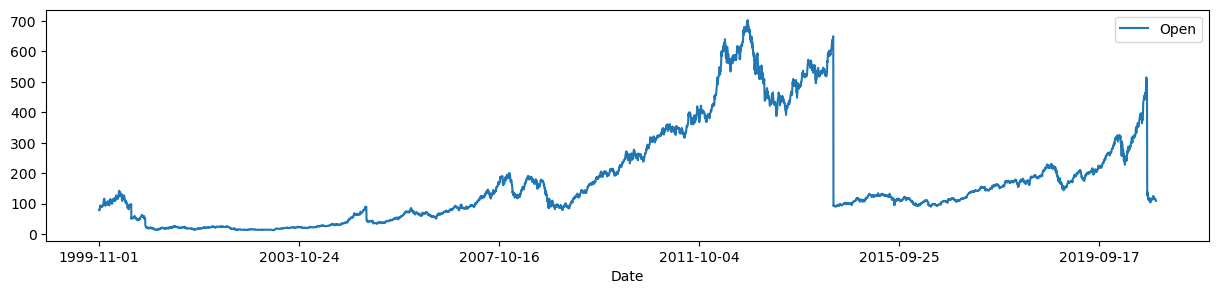

In [24]:
df4.plot.line(x = 'Date',y = 'Open',figsize=(15,3))

# Stationary  -- ADF Test 

* H0 : - The data is  non-stationary
* H1 : - The data is  stationary

* Alpha = 0.05 


In [25]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df4['Open'])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Test Statistic                   -2.362494
p-value                           0.152603
#lags used                        4.000000
number of observations used    5281.000000
dtype: float64

* we do not Reject Ho
* The data is  non-stationary

# Differencing  ( d )

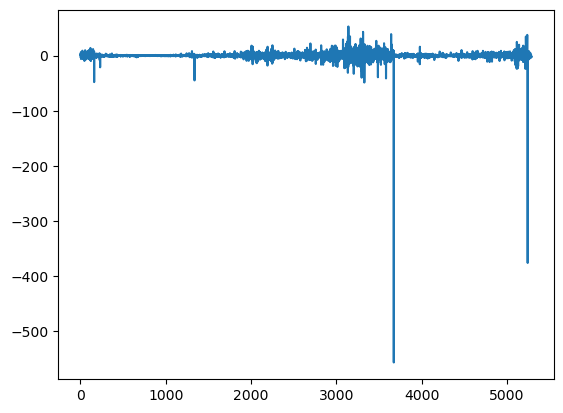

In [26]:
from matplotlib import pyplot

diff = df4.Open.diff()
pyplot.plot(diff)
pyplot.show()

In [27]:
df4['diff_1'] = df4['Open'].diff()
df4['diff_2'] = df4['Open'].diff(periods=2)
df4

,Date,Open,diff_1,diff_2
0,1999-11-01,80.00,NaN,NaN
1,1999-11-02,78.00,-2.00,NaN
2,1999-11-03,81.62,3.62,1.62
3,1999-11-04,82.06,0.44,4.06
4,1999-11-05,84.62,2.56,3.00
...,...,...,...,...
5281,2020-10-27,115.49,1.48,-0.90
5282,2020-10-28,115.05,-0.44,1.04
5283,2020-10-29,112.37,-2.68,-3.12
5284,2020-10-30,111.06,-1.31,-3.99


In [28]:
import numpy as np
np.var(df4)  # d = 1

Open      25551.091989
diff_1      108.828891
diff_2      212.388856
dtype: float64

In [29]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df4.diff_1.loc[1:,])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Observations of Dickey-fuller test


Test Statistic                  -35.870363
p-value                           0.000000
#lags used                        3.000000
number of observations used    5281.000000
dtype: float64



```
# This is formatted as code
```

* we Reject Ho
* The data is stationary

# ACF & PACF Plot

In [30]:
# ACF & PACF Plot

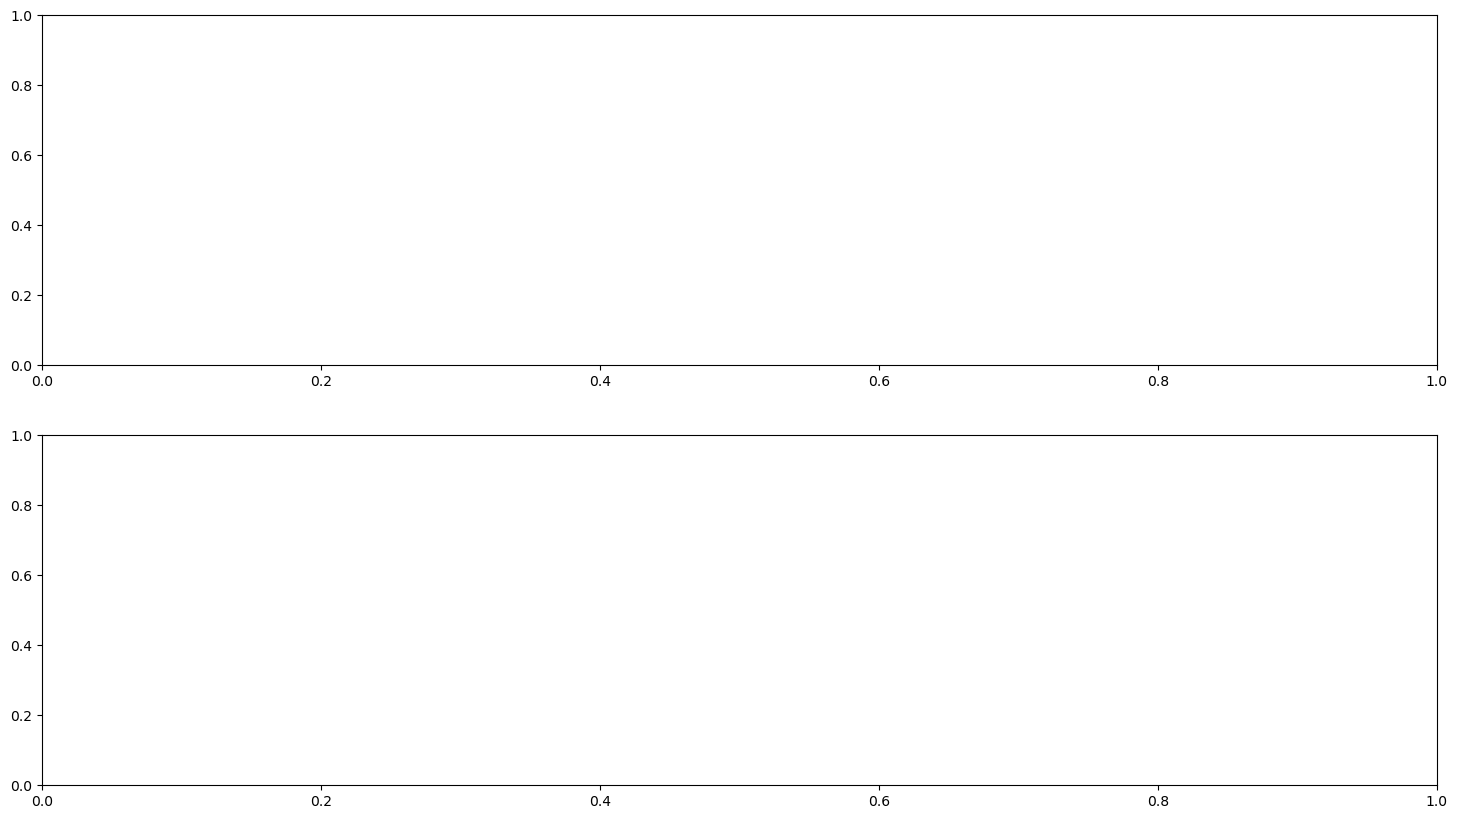

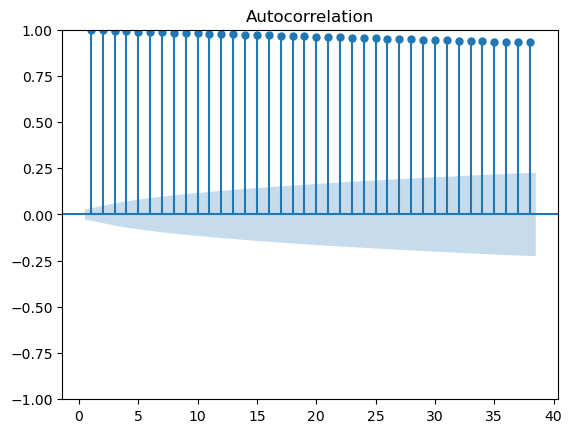

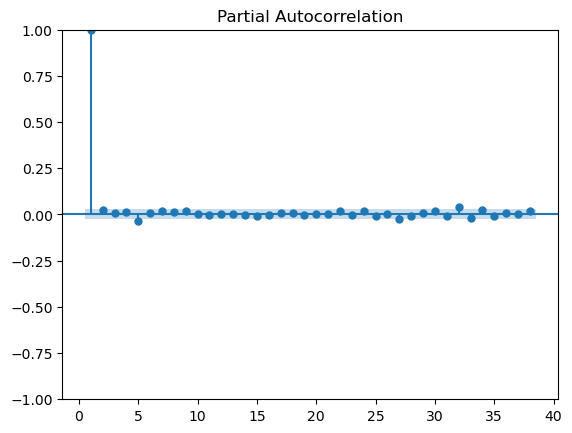

In [31]:
ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
plot_acf(df4['Open'] ,zero=False)
plot_pacf(df4['Open'] ,zero=False)
plt.show()

# ARIMA MODEL -- Auto ( Grid Search )

In [32]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(df4.Open,
                      start_p=0,max_p=3, # Pacf(p) = 0,1,2,3
                      d=0,max_d=2,       # Difference (d) = 0,1,2
                      start_q=0,max_q=3, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series
                      seasonal=False,    # No Seasonality  then below P,D,Q will not be used 
                      start_P=0,max_P=0,
                      D=0,max_D=0,
                      start_Q=0,max_Q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=72853.501, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=65894.366, Time=0.39 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=39797.008, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=39798.732, Time=0.56 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=39798.859, Time=0.37 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=60145.750, Time=1.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=39795.504, Time=2.21 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=39802.418, Time=1.54 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=39799.670, Time=1.26 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=39800.051, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=39800.971, Time=0.90 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=39799.546, Time=2.89 sec
 ARIMA(2,0,2)(0,0,0)[0] interce

# Fitted Value

In [33]:
df4['Forecast']=model.predict_in_sample()
df4.iloc[:,[0,1,4]]

,Date,Open,Forecast
0,1999-11-01,80.00,164.189483
1,1999-11-02,78.00,80.190510
2,1999-11-03,81.62,78.238038
3,1999-11-04,82.06,81.706190
4,1999-11-05,84.62,82.263305
...,...,...,...
5281,2020-10-27,115.49,112.907799
5282,2020-10-28,115.05,116.800521
5283,2020-10-29,112.37,113.959954
5284,2020-10-30,111.06,113.732121


# Model plot

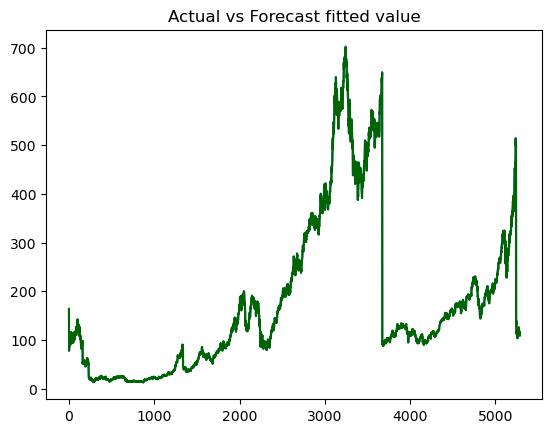

In [34]:
# Plot
plt.plot(df4.Open)
plt.plot(df4.Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

# Accuracy metrics


In [35]:
def forecast_accuracy(actual,forecast):
    mape = (np.mean(np.abs(actual-forecast)/np.abs(actual)))*100  # MAPE
    return({'mape':mape})

forecast_accuracy(df4.Open,df4.Forecast)

{'mape': 2.090152618638231}

#  Forecast - Future Month


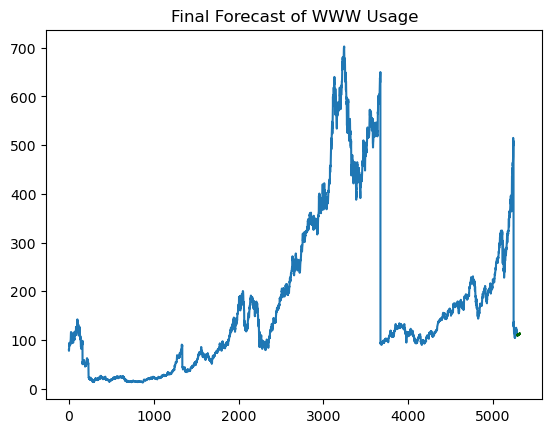

In [36]:
n_periods=29
fc = model.predict(n_periods=n_periods)
index_of_fc = np.arange(len(df4.Open), len(df4.Open)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)

# Plot
plt.plot(df4.Open)
plt.plot(fc_series, color='darkgreen')
plt.title("Final Forecast of WWW Usage")
plt.show()

# SARIMAX -- Auto ( Grid Search )

In [37]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
smodel = pm.auto_arima(df4.Open,
                      start_p=0,max_p=3, # Pacf(p) = 0,1,2,3
                      d=0,max_d=2,       # Difference (d) = 0,1,2
                      start_q=0,max_q=3, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series or time
                      seasonal=True,     # Seasonality is True then below P,D,Q will be used 
                      start_P=0,max_P=2,
                      D=0,max_D=1,
                      start_Q=0,max_Q=2,
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=68649.647, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=3.96 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=56667.463, Time=5.46 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=72853.501, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=61852.134, Time=0.92 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=48593.365, Time=14.07 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=47959.452, Time=9.74 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=49574.015, Time=39.42 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=36.60 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=2.86 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=39797.281, Time=4.90 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=39795.315, Time=0.44 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=39797.287, Time=3.31 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=5.97 sec
 ARIMA(1,0,0)(0,0,0)[12] i

# Fitted Value

In [38]:
# Fitted Value

In [39]:
df4['S_Forecast']=smodel.predict_in_sample()
df4.iloc[:,[0,1,5]]

,Date,Open,S_Forecast
0,1999-11-01,80.00,164.189483
1,1999-11-02,78.00,80.190510
2,1999-11-03,81.62,78.238038
3,1999-11-04,82.06,81.706190
4,1999-11-05,84.62,82.263305
...,...,...,...
5281,2020-10-27,115.49,112.907799
5282,2020-10-28,115.05,116.800521
5283,2020-10-29,112.37,113.959954
5284,2020-10-30,111.06,113.732121


# Model plot

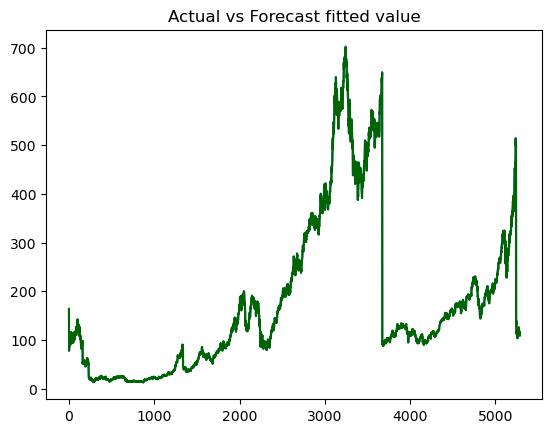

In [40]:
# Plot
plt.plot(df4.Open)
plt.plot(df4.S_Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

# Accuracy metrics


In [41]:
def forecast_accuracy(actual,forecast):
    mape = (np.mean(np.abs(actual-forecast)/np.abs(actual)))*100  # MAPE
    return({'mape':mape})

forecast_accuracy(df4.Open,df4.S_Forecast)

{'mape': 2.090152618638231}

#  Forecast


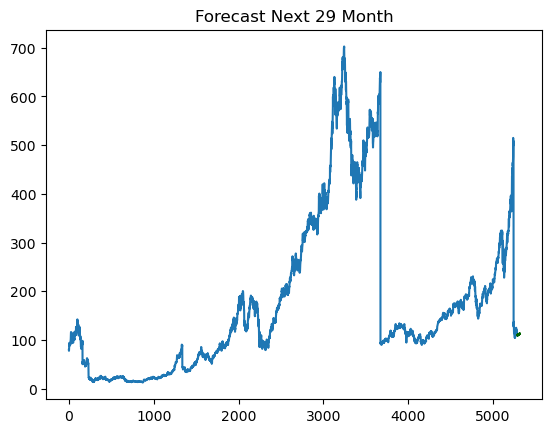

In [42]:
n_periods=29
future_Forecast = smodel.predict(n_periods=n_periods)
index_of_future_Forecast = np.arange(len(df4.Open), len(df4.Open)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(future_Forecast, index=index_of_future_Forecast)

# Plot
plt.plot(df4.Open)
plt.plot(fc_series, color='darkgreen')
plt.title("Forecast Next 29 Month")
plt.show()# Finished

# Finished

In [43]:
future_Forecast

5286    110.431812
5287    109.375200
5288    110.654433
5289    109.623024
5290    110.876317
5291    109.869549
5292    111.097461
5293    110.114786
5294    111.317864
5295    110.358746
5296    111.537524
5297    110.601438
5298    111.756440
5299    110.842873
5300    111.974611
5301    111.083060
5302    112.192034
5303    111.322010
5304    112.408709
5305    111.559732
5306    112.624636
5307    111.796236
5308    112.839813
5309    112.031530
5310    113.054239
5311    112.265625
5312    113.267913
5313    112.498530
5314    113.480836
dtype: float64